# Context
The RMS Titanic was a British luxury passenger liner that tragically sank on April 15, 1912, during its maiden voyage from Southampton to New York City. After striking an iceberg in the North Atlantic, the ship sank, resulting in the loss of more than 1,500 lives. This disaster led to significant changes in maritime safety regulations and has been the subject of numerous stories, films, and scholarly studies.

This notebook's objective is to **perform Exploratory Data Analysis (EDA) and data cleaning** on the Titanic Dataset, **training a model** and finally **making predictions** on new data.

# Import libraries
First, we import some libraries, and load the titanic dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# do not show warnings in stdout, if any
import warnings
warnings.filterwarnings("ignore")

# Import raw dataset

In [3]:
!gdown https://drive.google.com/uc?id=1etLqt-u4FtGFH1mGfVZuqgf5jKunC9K2

Downloading...
From: https://drive.google.com/uc?id=1etLqt-u4FtGFH1mGfVZuqgf5jKunC9K2
To: /kaggle/working/titanic.zip
100%|██████████████████████████████████████| 34.9k/34.9k [00:00<00:00, 46.4MB/s]


In [4]:
import zipfile
with zipfile.ZipFile("/kaggle/working/titanic.zip","r") as zip_ref:
    zip_ref.extractall("./titanic")

In [5]:
# Load train dataset
df = pd.read_csv('./titanic/train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.rename(columns={"Survived":"survived",
                   "Pclass":"pclass",
                   "Name": "name",
                   "Sex":"sex",
                   "Age":"age",
                   "SibSp":"sibsp",
                   "Parch":"parch",
                   "Ticket":"ticket",
                   "Fare":"fare",
                   "Cabin":"cabin",
                   "Embarked":"embarked",
                   }, inplace = True)

Columns description:
* PassengerID: ID number assigned to the passenger
* Survived: survival status (0 = No, 1 = Yes)
* pclass: passenger's class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
* name: passenger's name
* sex: passenger's sex (male/female)
* age: passenger's age (number)
* sibsp: number of siblings/spouses aboard
* parch: number of parents/children aboard
* ticket: ticket number
* fare: how much the passenger paid for the ticket
* cabin: Cabin deck [A-G] and number
* embarked: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# Exploratory Data Analysis and data transformation
This section has two objectives:
1. **EDA:** to analyze the data in the Dataset in order to get insights that will give us knowledge to train a robust model (in a subsequent notebook)
2. **Data cleaning and transformations:** to treat outliers and missing values, and perform feature engineering on the data

Dataset datatypes: it gives us an idea of the variable types, that gives us a hint on what type of data we could find

In [8]:
df.dtypes

PassengerId      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

Dataset description: gives us descriptive statistics for each numerical column, and also we can infer which numerical columns have missing values by looking at the "count" parameter (in this case "age" has missing values)

In [9]:
df.describe()

,PassengerId,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Remove unnecesary columns
Some columns do not add relevant information, such as the name and the ticket number (from the name we could perform some feature engineering, extracting prefixes like Sr, Dr, etc, but we will not do that in this notebook)

In [10]:
df.drop(columns=["name","ticket"], inplace = True)

## Assign correct Datatypes
Each individual column is assigned an adequate datatype, according to the values it contains

> *Note: some columns, such as "survived" contain boolean values, meaning that there are only two possible values: "True" and "False". In this case, a "boolean" dtype looks like the ideal choice, but since some machine learning algorithms have trouble with boolean dtypes, we are going to convert them to "float" instead of "boolean". This is also the default dtype assigned in one-hot encoding later in the notebook*

In [11]:
# list all columns
df.columns

Index(['PassengerId', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [12]:
# list all datatypes
df.dtypes

PassengerId      int64
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
cabin           object
embarked        object
dtype: object

In [13]:
# the describe method gives an idea of the values assumed from numerical columns
df.describe()

,PassengerId,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# print unique values for each column
for column in df.columns:
  print(column, df[column].unique())

PassengerId [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [15]:
df.head()

,PassengerId,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


Convert to adequate datatypes

In [16]:
df['survived'] = df['survived'].astype('float')
df['pclass'] = df['pclass'].astype('int')
df['sex'] = df['sex'].astype('category')
df['age'] = df['age'].astype('float')
df['sibsp'] = df['sibsp'].astype('int')
df['parch'] = df['parch'].astype('int')
df['fare'] = df['fare'].astype('float')
df['embarked'] = df['embarked'].astype('category')
df['cabin'] = df['cabin'].astype('category')

In [17]:
# check new dtypes
df.dtypes

PassengerId       int64
survived        float64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
cabin          category
embarked       category
dtype: object

In [18]:
df.head()

,PassengerId,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1.0,1,female,38.0,1,0,71.2833,C85,C
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,S
3,4,1.0,1,female,35.0,1,0,53.1000,C123,S
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,S


## Missing values
Since there are many missing values, we must locate them and then decide what to do:
* Remove entire column
* Remove rows with missing values
* Imputate values when there is missing data

In [19]:
# get missing value count per column
df.isnull().sum()

PassengerId      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
cabin          687
embarked         2
dtype: int64

### cabin
Cabin deck [A-G] and a number.

Since we have 891 entries, and deck has 688 missing values (77%), then this column is discarded because the majority of the data is missing

In [20]:
df.drop(columns="cabin", inplace = True)

### embarked
* embarked: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Since there are only two missing values in the entire dataset, and the column may be useful, only the two data points are discarded

In [21]:
# display rows with missing values in 'embarked'
df[df['embarked'].isnull()]

,PassengerId,survived,pclass,sex,age,sibsp,parch,fare,embarked
61,62,1.0,1,female,38.0,0,0,80.0,NaN
829,830,1.0,1,female,62.0,0,0,80.0,NaN


We can see that the rows with missing values are the same (if not, then we could assign the missing value in a column by looking at the corresponding value on the other one). Then we can drop both rows

In [22]:
# drop rows with missing values in 'embarked'
df.dropna(subset=['embarked'], inplace=True)
df.reset_index(inplace = True, drop = True)

### age
Passenger's age (number)

We have 177 missing values (about 20% of the original 891 values). Since the missing values represent an important percentage of the entire dataset, and logic indicates that this column may contain useful information for our model, we should imputate values where they are missing

We could simply assign the mean to the missing values, but a better approach would be to calculate the mean age of groups of similar people considering different related attributes, such as:
* pclass: passenger's class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
* sibsp: number of siblings/spouses aboard
* parch: number of parents/children aboard

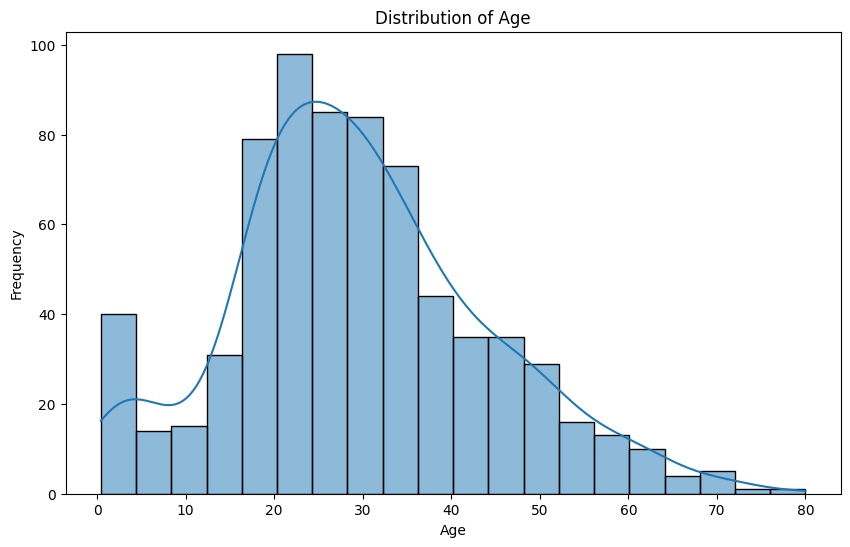

In [23]:
# plot a histogram of the age values before imputation
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We create two new columns, sibsp_bin and parch_bin, to reduce the granularity of sibsp (split into “0” vs. “>0”) and parch (split into “0”, “1_or_2”, and “3_plus”). This grouping keeps passengers who travel alone or with only a small family separate from those with large families, ensuring that the median age used to fill missing values is more representative for each subgroup. Also, if parch's value is larger than 3, then the person is travelling with a son

In [24]:
# Create auxiliary columns by binning 'sibsp' and 'parch'
df['sibsp_bin'] = df['sibsp'].apply(lambda x: '0' if x == 0 else '>0')
df['parch_bin'] = df['parch'].apply(lambda x: '0' if x == 0 else ('1_or_2' if x <= 2 else '3_plus'))

# Group by the relevant (original + binned) columns
grouped_median = df.groupby(['pclass', 'sibsp_bin', 'parch_bin'])

# For each group, fill the missing 'age' values with the group median
df['age'] = grouped_median['age'].transform(lambda x: x.fillna(x.median()))

# delete auxiliary columns sibsp_bin and parch_bin
df.drop(columns = ['sibsp_bin', 'parch_bin'], inplace = True)

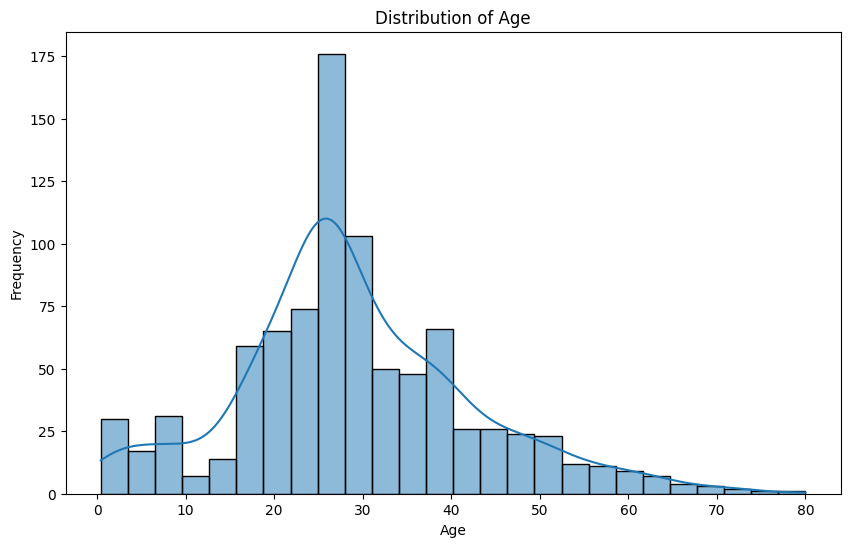

In [25]:
# plot a histogram of the age values after imputation
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Comparing the histogram before and after imputation,we can see that a lot of passengers were assigned an age near 30 years

### Final check
There are no more missing values, and our dataset has 889 rows (only two were discarded)

In [26]:
# get missing value count per column
df.isnull().sum()

PassengerId    0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
dtype: int64

In [27]:
df.shape

(889, 9)

## Outliers removal
We must first identify outliers and then decide on a method to treat them, such as imputation or removal.

Our criteria for detecting outliers will be if the value falls outside the mean -+ 3 std_dev

Since the columns that are most likely to have outliers are age, fare, sibsp and parch and the min-max values for those columns are plausible, we will simply remove outliers in order to not introduce an imputation error (we have about 900 samples, to drop a few of them is not a big deal)

**Identify outliers**

We are going to define a helper function to visualize outliers

In [28]:
def visualize_outliers(dataframe, column_name):
  fig, axs = plt.subplots(1, 2)
  fig.suptitle(column_name)
  dataframe.boxplot(column=str(column_name), rot=90, ax=axs[0])
  sns.distplot(dataframe[str(column_name)], vertical=True, ax=axs[1])
  fig.tight_layout()

  # count outliers
  mean = dataframe[column_name].mean()
  std = dataframe[column_name].std()
  print('Num. outliers (outside 3 std_dev): ', (dataframe[(dataframe[column_name] >= mean+3*std) | (dataframe[column_name] <= mean-3*std)]).shape[0])

Num. outliers (outside 3 std_dev):  7


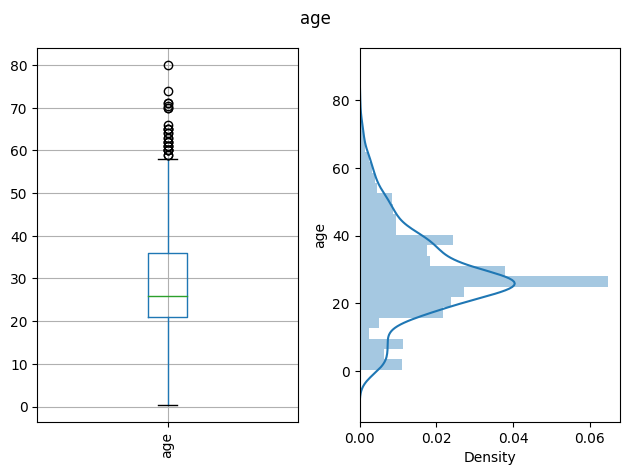

In [29]:
visualize_outliers(df, 'age')

Num. outliers (outside 3 std_dev):  20


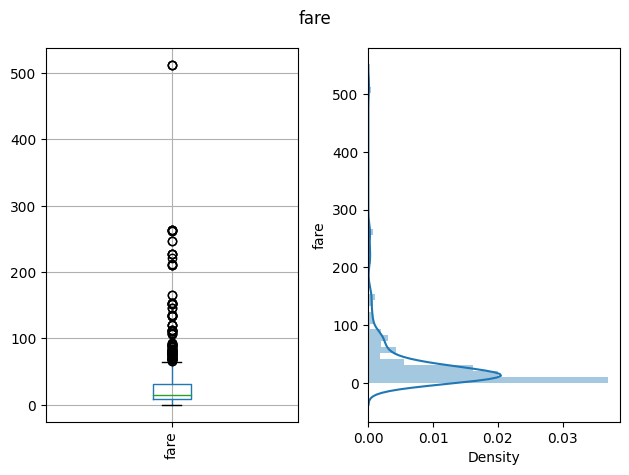

In [30]:
visualize_outliers(df, 'fare')

Num. outliers (outside 3 std_dev):  30


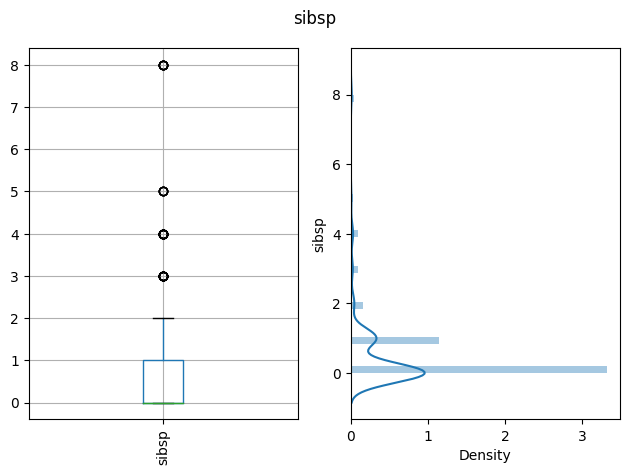

In [31]:
visualize_outliers(df, 'sibsp')

Num. outliers (outside 3 std_dev):  15


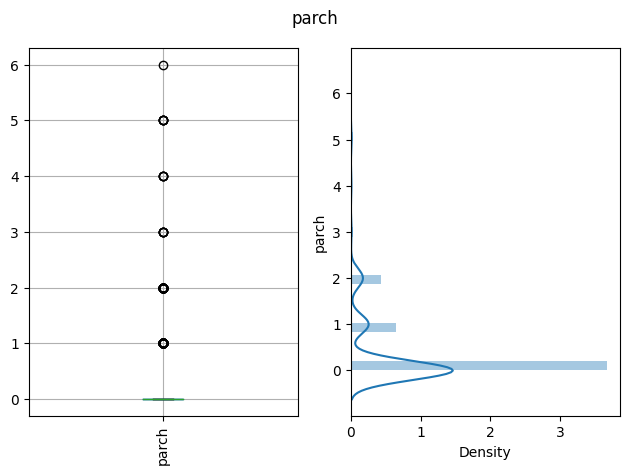

In [32]:
visualize_outliers(df, 'parch')

**Remove outliers**

Remove all values that are outside the range +-3std_dev from the mean

In [33]:
def remove_3std_outliers(dataframe, column_name):
  shape_before = dataframe.shape[0]

  mean = dataframe[column_name].mean()
  std = dataframe[column_name].std()
  dataframe = (dataframe[(dataframe[column_name] <= mean+3*std) & (dataframe[column_name] >= mean-3*std)])

  shape_after = dataframe.shape[0]

  print('Dropped', shape_before-shape_after, 'outliers')
  print('Dataset entries:', shape_before, '->', shape_after)

  dataframe.reset_index(inplace = True, drop = True)

  return dataframe

In [34]:
df = remove_3std_outliers(df, 'age')

Dropped 7 outliers
Dataset entries: 889 -> 882


In [35]:
df = remove_3std_outliers(df, 'fare')

Dropped 20 outliers
Dataset entries: 882 -> 862


In [36]:
df = remove_3std_outliers(df, 'sibsp')

Dropped 30 outliers
Dataset entries: 862 -> 832


In [37]:
df = remove_3std_outliers(df, 'parch')

Dropped 14 outliers
Dataset entries: 832 -> 818


## One-hot encoding of categorical values
We have some categorical columns that should be one-hot encoded. This is because later we may want to try a deep learning model for performing predictions. In this format, the input data is more suitable for entering a Neural Network than in categories or ordinal encoded labels.

In [38]:
df.dtypes

PassengerId       int64
survived        float64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
dtype: object

The columns that should be encoded are (with their unique values between brackets):
* sex ['male', 'female']
* embarked ['S', 'C', 'Q']
* class ['Third', 'First', 'Second']
* who ['man', 'woman', 'child']
* embark_town ['Southampton', 'Cherbourg', 'Queenstown']

In theory, if we had N categories, then we would only need N-1 one-hot-encoded columns (because the remaining one can be inferred when all the others are equal to 0). For an easy interpretation, we are going to mantain all N columns

In [39]:
df['embarked'].unique()

['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [40]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['sex', 'embarked', 'pclass']
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

In [41]:
encoder.feature_names_in_

array(['sex', 'embarked', 'pclass'], dtype=object)

In [42]:
encoder.get_feature_names_out(categorical_columns)

array(['sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S',
       'pclass_1', 'pclass_2', 'pclass_3'], dtype=object)

In [43]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array([1, 2, 3])]

In [44]:
encoded_df.head()

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [45]:
# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
df.drop(columns=categorical_columns, inplace=True)

In [46]:
df.rename(columns={"embarked_C":"embark_town_Cherbourg",
                   "embarked_Q":"embark_town_Queenstown",
                   "embarked_S": "embark_town_Southampton",
                   "pclass_1":"class_First",
                   "pclass_2":"class_Second",
                   "pclass_3":"class_Third"
                   }, inplace = True)

In [47]:
df.head()

,PassengerId,survived,age,sibsp,parch,fare,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third
0,1,0.0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1.0,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1.0,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1.0,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,5,0.0,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


## Redundant columns cleanup

We have some columns that convey the same information. For example "sex_female" and "sex_male" have opposite values. In order to keep the model simple, it is not a good practice to use both columns, but only a single one, since both have the same information.

For other cases, such as with passenger's class or embark town, we could only use two columns instead of three (for example, omit the Southampton column, and assume that was the embark town when values from Queenstown and Cherbourg are both zero). In this particular case, it is easier for a human to interpret the results having three columns, so it is a design choice to keep the three columns even when we know that the model only needs two

### Males and females
We have two columns: "sex_male" and "sex_female". We should keep only one of them and discard the other, since they contain the same information. We are going to discard "sex_female" and rename "sex_male" with "male"

Float dtype is used instead of boolean

Before removing the redundant column, we are going to check that both columns are mutually exclusive. We will do it by:


*   Plotting a scatter plot: we expect to see only two dots. If 3 or 4 are shown, then there is at least one value that contains both male and female, or none of them
*   With a helper function that checks for each element in both columns. If the value in one column is the inverse  of the other, then a "True" is returned for that pair. At the end, we get the unique values. If that gets us only one value and that is "True", then we confirm that the columns are mutually exclusive

Since we obtained both columns with one hot encoding, then they must be mutually exclusive, but we are going to double check anyways


In [48]:
(df['sex_female'] != df['sex_male']).unique()

array([ True])

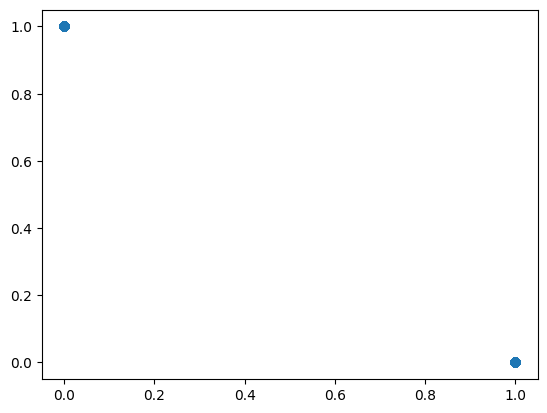

In [49]:
plt.scatter(df["sex_male"], df["sex_female"])

Now that we checked that the columns contain the same information, we drop one and rename the other

In [50]:
# drop "sex_female" column
df.drop(columns=["sex_female"], inplace = True)

In [51]:
# rename "sex_male" with "male"
df.rename(columns={"sex_male":"male"}, inplace = True)

## Add child feature
We will add a new feature that is a boolean. It will be 1 if the passenger has 15 years or less, and 0 otherwise

In [52]:
df['child'] = df["age"] <= 15

# convert to float
df['child'] = df['child'].astype('float')

## Scale values
Since most algorithms perform better when given scaled values at their inputs, we are going to do that with numerical columns that are not in the range 0-1

First, we will perform an analysis to determine wich columns need scaling, and then determine which type of scaling is best suited

In [53]:
df.describe()

,PassengerId,survived,age,sibsp,parch,fare,male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,child
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,445.718826,0.388753,29.223924,0.349633,0.255501,25.703621,0.658924,0.187042,0.086797,0.726161,0.232274,0.221271,0.546455,0.086797
std,254.817964,0.487765,12.500776,0.619951,0.565859,29.733184,0.474361,0.390183,0.281710,0.446200,0.422541,0.415357,0.498142,0.281710
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,227.250000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.500000,0.000000,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,660.750000,1.000000,36.000000,1.000000,0.000000,26.550000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,891.000000,1.000000,66.000000,3.000000,2.000000,164.866700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The columns that are already in the range 0-1 do not need scaling. That leaves us the following columns to scale:

age, sibsp, parch, fare

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

### age
This column contains the age of the passenger. The minimum age is 0, and the oldest person that ever lived reached 122 years. Considering that, we could use MinMaxScaler, but since out dataset does not contain any sample with 0 or 122 years, we could do our own custom scaler

<Axes: xlabel='age', ylabel='Density'>

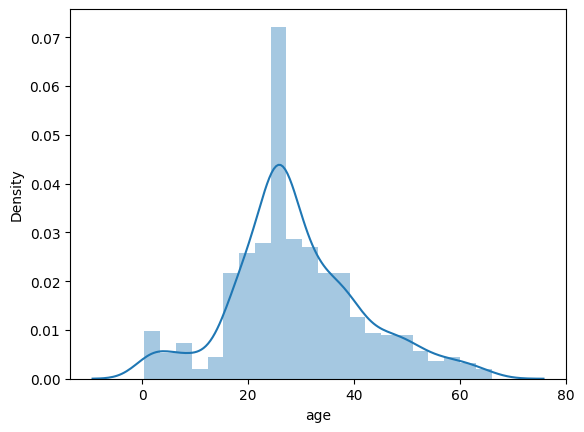

In [55]:
sns.distplot(df['age'])

In [56]:
# Define limits
min_age = 0
max_age = 122

# Apply normalization
df['age_scaled'] = (df['age'] - min_age) / (max_age - min_age)

In [57]:
df[['age','age_scaled']].describe()

,age,age_scaled
count,818.000000,818.000000
mean,29.223924,0.239540
std,12.500776,0.102465
min,0.420000,0.003443
25%,22.000000,0.180328
50%,26.000000,0.213115
75%,36.000000,0.295082
max,66.000000,0.540984


### sibsp

sibsp: number of siblings/spouses aboard

In [58]:
# Define helper function to not repeat code on each column to scale
def scale_column(df, column, scaler_type):
    data = df[column].to_numpy().reshape(-1, 1)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
    sns.distplot(df[column], ax=axes[0])
    axes[0].set_title(f"Distribution of {column} before scaling")
    stype = scaler_type.lower()
    if stype == 'minmax':
        scaler = MinMaxScaler()
        scaler.fit(data)
        print("Mean:", scaler.min_)
        print("Scale:", scaler.scale_)
    elif stype == 'standard':
        scaler = StandardScaler()
        scaler.fit(data)
        print("Mean:", scaler.mean_)
        print("Var:", scaler.var_)
        print("Scale (StDev):", scaler.scale_)
    elif stype == 'robust':
        scaler = RobustScaler()
        scaler.fit(data)
        print("Center:", scaler.center_)
        print("Scale:", scaler.scale_)
    else:
        raise ValueError("Unknown scaler type")
    df[f"{column}_scaled"] = scaler.transform(data)
    sns.distplot(df[f"{column}_scaled"], ax=axes[1])
    axes[1].set_title(f"Distribution of {column} after scaling")
    plt.tight_layout()
    plt.show()


We are going to use a MinMax scaler for this feature

Mean: [0.]
Scale: [0.33333333]


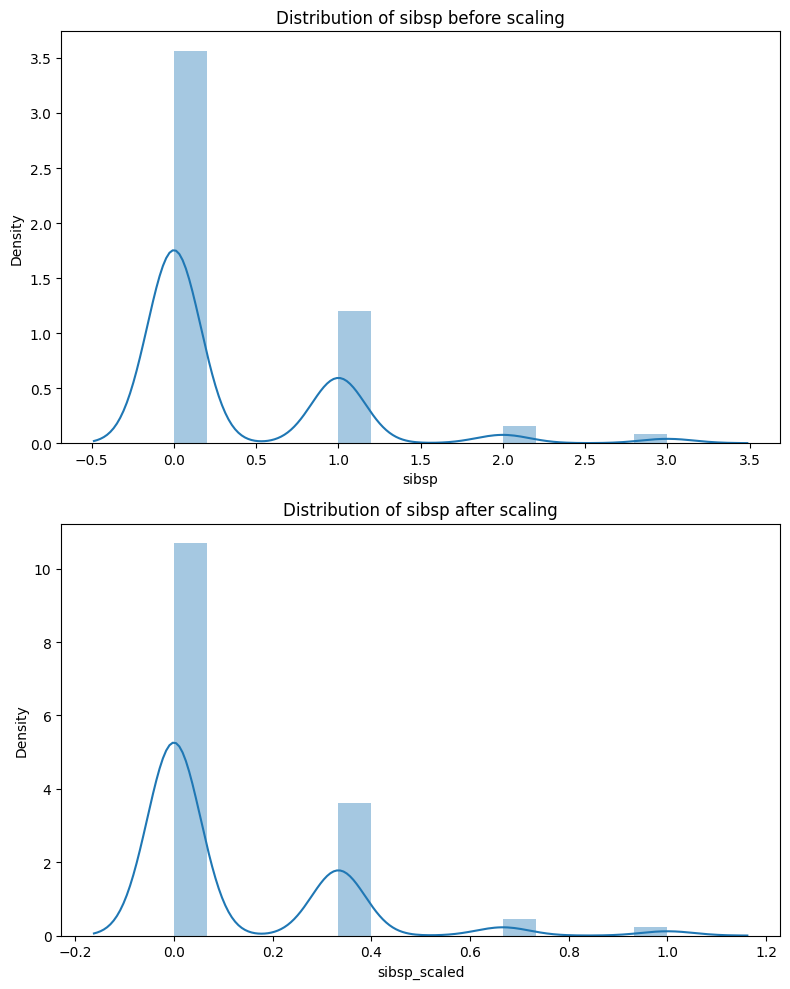

In [59]:
scale_column(df,'sibsp','minmax')

### parch

parch: number of parents/children aboard

Mean: [0.]
Scale: [0.5]


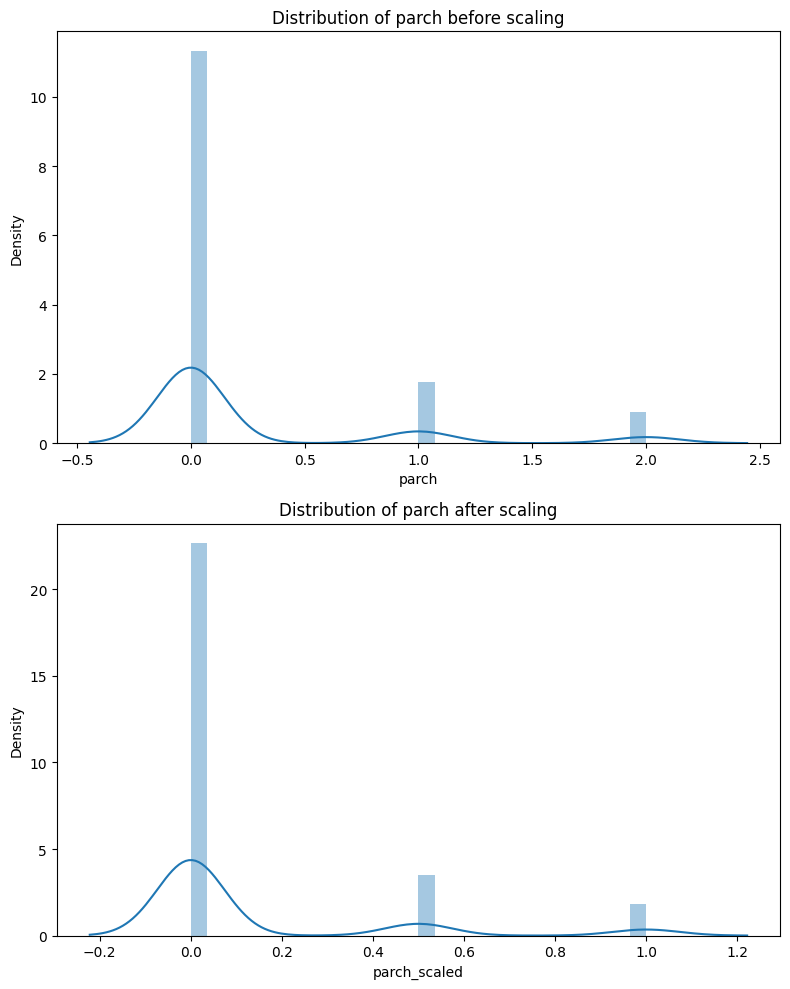

In [60]:
scale_column(df,'parch','minmax')

### fare

fare: how much the passenger paid for the ticket

Mean: [25.70362066]
Var: [882.98146173]
Scale (StDev): [29.71500398]


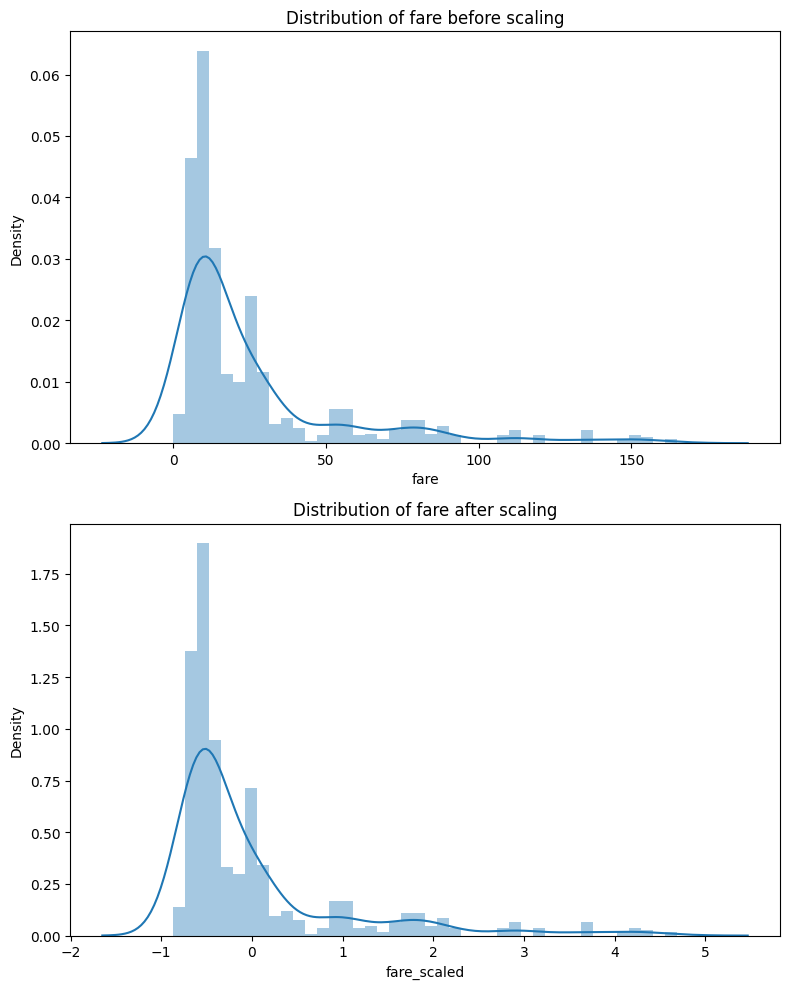

In [61]:
scale_column(df,'fare','standard')

## Reorder columns
For better readability

In [62]:
df = df[['PassengerId',
       'survived',
       'age',
       'age_scaled',
       'male',
       'child',
       'fare',
       'fare_scaled',
       'class_First',
       'class_Second',
       'class_Third',
       'sibsp',
       'sibsp_scaled',
       'parch',
       'parch_scaled',
       'embark_town_Cherbourg',
       'embark_town_Queenstown',
       'embark_town_Southampton'
       ]]

In [63]:
df.head()

,PassengerId,survived,age,age_scaled,male,child,fare,fare_scaled,class_First,class_Second,class_Third,sibsp,sibsp_scaled,parch,parch_scaled,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,1,0.0,22.0,0.180328,1.0,0.0,7.2500,-0.621020,0.0,0.0,1.0,1,0.333333,0,0.0,0.0,0.0,1.0
1,2,1.0,38.0,0.311475,0.0,0.0,71.2833,1.533894,1.0,0.0,0.0,1,0.333333,0,0.0,1.0,0.0,0.0
2,3,1.0,26.0,0.213115,0.0,0.0,7.9250,-0.598305,0.0,0.0,1.0,0,0.000000,0,0.0,0.0,0.0,1.0
3,4,1.0,35.0,0.286885,0.0,0.0,53.1000,0.921971,1.0,0.0,0.0,1,0.333333,0,0.0,0.0,0.0,1.0
4,5,0.0,35.0,0.286885,1.0,0.0,8.0500,-0.594098,0.0,0.0,1.0,0,0.000000,0,0.0,0.0,0.0,1.0


## Survival probability by feature
As an additional EDA step, we are going to analyze how each feature's value affects the survival probability

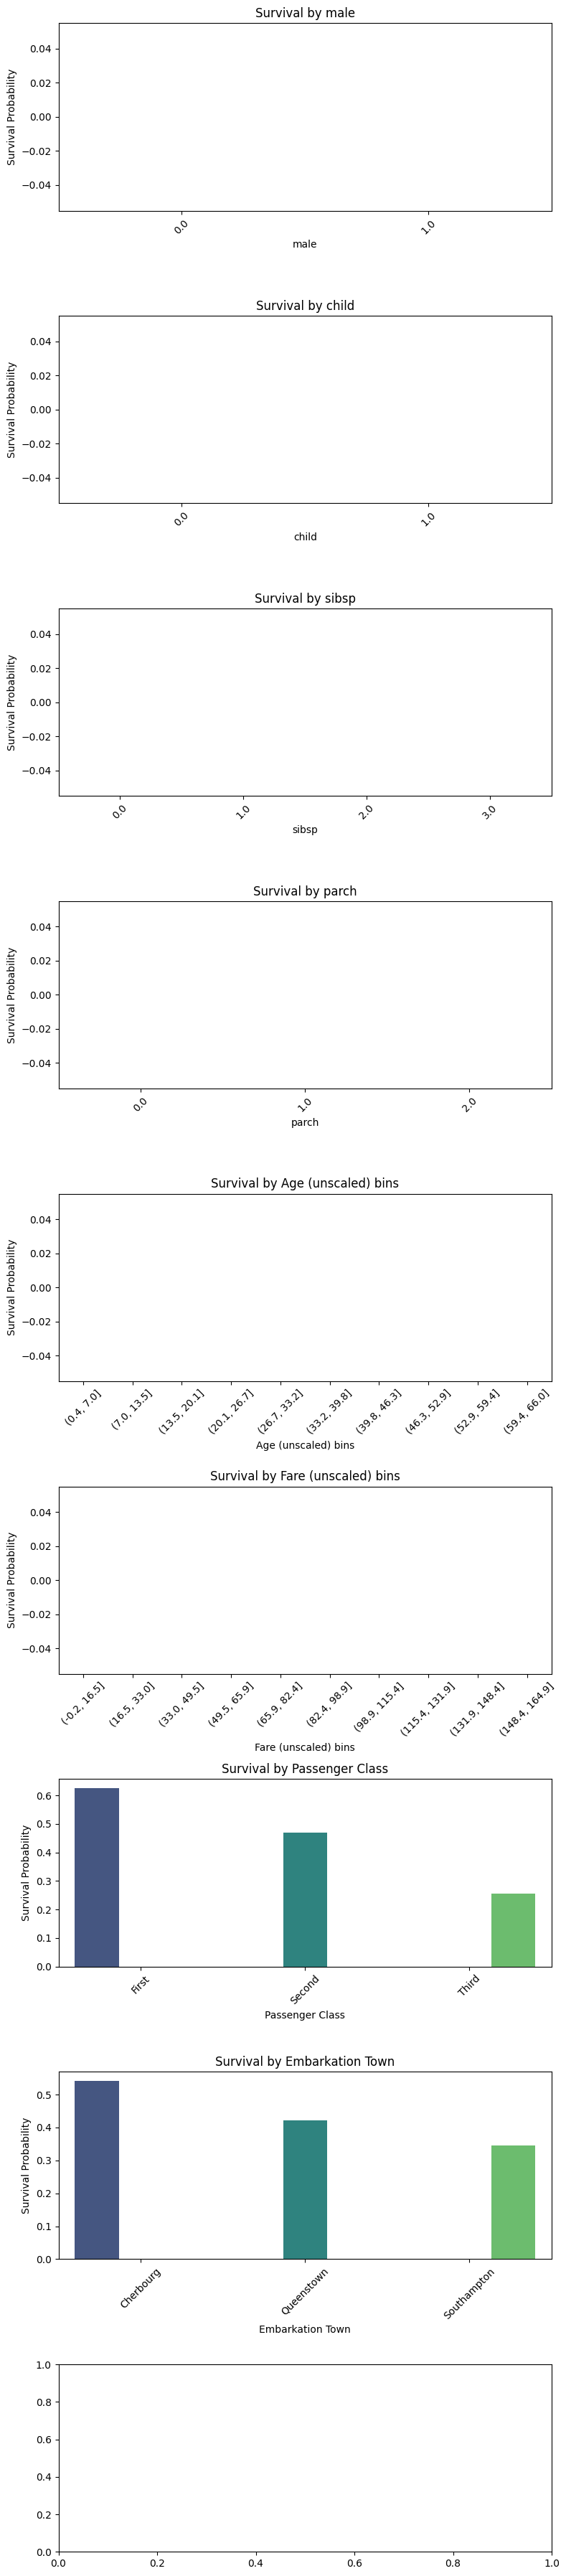

In [64]:
# Helper function for plotting a bar chart.
def plot_bar(ax, x_vals, y_vals, x_label, title):
    temp_df = pd.DataFrame({'Category': x_vals, 'Survived': y_vals})

    # If x_vals is a Categorical, preserve its ordering.
    if hasattr(x_vals, 'cat'):
        order = list(x_vals.cat.categories)
        # If categories are intervals, format using their left and right.
        if isinstance(order[0], pd.Interval):
            tick_labels = [f"({iv.left:.1f}, {iv.right:.1f}]" for iv in order]
            # Convert intervals to strings for ordering.
            order_str = [str(iv) for iv in order]
        else:
            tick_labels = list(order)
            order_str = list(order)
    else:
        # Try converting to numeric.
        try:
            temp_df['Category_numeric'] = pd.to_numeric(temp_df['Category'], errors='raise')
            temp_df = temp_df.sort_values(by='Category_numeric')
            unique_vals = temp_df['Category_numeric'].unique()
            order_str = [str(val) for val in unique_vals]
            tick_labels = [f"{val:.1f}" for val in unique_vals]
        except Exception:
            temp_df = temp_df.sort_values(by='Category')
            unique_vals = sorted(temp_df['Category'].unique())
            order_str = unique_vals
            tick_labels = unique_vals

    palette = sns.color_palette("viridis", n_colors=len(order_str))

    sns.barplot(x='Category', y='Survived', data=temp_df,
                palette=palette, errorbar=None, ax=ax, order=order_str, hue='Category')
    leg = ax.get_legend()
    if leg is not None:
        leg.remove()
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel("Survival Probability")
    # Set tick positions explicitly.
    ax.set_xticks(np.arange(len(order_str)))
    ax.set_xticklabels(tick_labels, rotation=45)

# ----------------------------
# 1. Individual (binary/discrete) features.
temp_features = {
    'male': df['male'],
    'child': df['child'],
    'sibsp': df['sibsp'],
    'parch': df['parch'],
}

# ----------------------------
# 2. Continuous features: age_scaled and fare_scaled.
# Compute temporary unscaled series without modifying df.
age_unscaled = df['age']
fare_unscaled = df['fare']
# Create bins from the unscaled values; they are ordered categoricals.
age_bins = pd.cut(age_unscaled, bins=10, ordered=True)
fare_bins = pd.cut(fare_unscaled, bins=10, ordered=True)

# ----------------------------
# 3. Combined one-hot for Passenger Class.
class_features = ['class_First', 'class_Second', 'class_Third']
class_names    = ['First', 'Second', 'Third']
class_survival = [df.loc[df[feat] == 1, 'survived'].mean() for feat in class_features]

# ----------------------------
# 4. Combined one-hot for Embarkation Town.
embark_features = ['embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton']
embark_names    = ['Cherbourg', 'Queenstown', 'Southampton']
embark_survival = [df.loc[df[feat] == 1, 'survived'].mean() for feat in embark_features]

# ----------------------------
# Total number of plots:
# Individual features: len(temp_features) + 2 (Age and Fare) + 1 (Class) + 1 (Embarkation) = 5+2+1+1 = 9.
n_plots = 9

fig, axes = plt.subplots(n_plots, 1, figsize=(8, 4 * n_plots))
axes = axes.flatten()
plot_idx = 0

# --- Plot individual features.
for feature, series in temp_features.items():
    if pd.api.types.is_numeric_dtype(series):
        x_vals = series.astype(float)
    else:
        x_vals = series.astype(str)
    plot_bar(axes[plot_idx],
             x_vals=x_vals,
             y_vals=df['survived'],
             x_label=feature,
             title=f"Survival by {feature}")
    plot_idx += 1

# --- Plot continuous feature: Age.
plot_bar(axes[plot_idx],
         x_vals=age_bins,  # Pass as categorical; helper will handle ordering
         y_vals=df['survived'],
         x_label="Age (unscaled) bins",
         title="Survival by Age (unscaled) bins")
plot_idx += 1

# --- Plot continuous feature: Fare.
plot_bar(axes[plot_idx],
         x_vals=fare_bins,
         y_vals=df['survived'],
         x_label="Fare (unscaled) bins",
         title="Survival by Fare (unscaled) bins")
plot_idx += 1

# --- Combined bar chart for Passenger Class.
temp_class = pd.DataFrame({
    'Category': class_names,
    'Survived': class_survival
})
order_class = sorted(temp_class['Category'], key=lambda x: x)  # Alphabetical order (or define a custom order)
palette_class = sns.color_palette("viridis", n_colors=len(order_class))
ax = axes[plot_idx]
sns.barplot(x='Category', y='Survived', data=temp_class,
            palette=palette_class, errorbar=None, ax=ax, hue='Category', order=order_class)
leg = ax.get_legend()
if leg is not None:
    leg.remove()
ax.set_title("Survival by Passenger Class")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Survival Probability")
ax.set_xticks(np.arange(len(order_class)))
ax.set_xticklabels(order_class, rotation=45)
plot_idx += 1

# --- Combined bar chart for Embarkation Town.
temp_embark = pd.DataFrame({
    'Category': embark_names,
    'Survived': embark_survival
})
order_embark = sorted(temp_embark['Category'], key=lambda x: x)
palette_embark = sns.color_palette("viridis", n_colors=len(order_embark))
ax = axes[plot_idx]
sns.barplot(x='Category', y='Survived', data=temp_embark,
            palette=palette_embark, errorbar=None, ax=ax, hue='Category', order=order_embark)
leg = ax.get_legend()
if leg is not None:
    leg.remove()
ax.set_title("Survival by Embarkation Town")
ax.set_xlabel("Embarkation Town")
ax.set_ylabel("Survival Probability")
ax.set_xticks(np.arange(len(order_embark)))
ax.set_xticklabels(order_embark, rotation=45)
plot_idx += 1

plt.tight_layout()
plt.show()


## Export processed dataset
After cleaning the dataset, we export it to a CSV file in order to be retrieved later when we train a machine learning model on it

In [65]:
df.to_csv('titanic_processed.csv', index=False)

# Model Training
This section's objective is to train some models to predict the probability that a passenger of the Titanic may survive or not.

The models will be trained on the processed dataset obtained on the previous section

After training and optimizing the models, they will be compared and the best one will be selected

## Obtain scaling functions
Since in the previous section we have obtained some predictors by scaling the original ones, here we will obtain the scalers, in order to do the inverse transform on the predicted values.

The columns that were scaled are:
* age: custom scaling mapping: at the output, 1 equals to 122 years and 0 equals to 0 years
* sibsp: minmax scaler
* parch: minmax scaler
* fare: standard scaler

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

### Scalers

In [67]:
scaler_sibsp = MinMaxScaler()
scaler_sibsp.fit(df['sibsp'].to_numpy().reshape(-1, 1))

MinMaxScaler()

In [68]:
scaler_parch = MinMaxScaler()
scaler_parch.fit(df['parch'].to_numpy().reshape(-1, 1))

MinMaxScaler()

In [69]:
scaler_fare = StandardScaler()
scaler_fare.fit(df['fare'].to_numpy().reshape(-1, 1))

StandardScaler()

### Scaling functions
The goal is to obtain a function that takes as input a scaled value and returns the unscaled one

In [70]:
def inverse_transform_sibsp(sibsp_scaled):
  return scaler_sibsp.inverse_transform(np.array(sibsp_scaled).reshape(-1, 1))[0][0]

In [71]:
def inverse_transform_parch(parch_scaled):
  return scaler_parch.inverse_transform(np.array(parch_scaled).reshape(-1, 1))[0][0]

In [72]:
def inverse_transform_fare(fare_scaled):
  return scaler_fare.inverse_transform(np.array(fare_scaled).reshape(-1, 1))[0][0]

In [73]:
def inverse_transform_age(age_scaled):
  min_age = 0
  max_age = 122
  return age_scaled * (max_age - min_age) + min_age

In [74]:
# Example
inverse_transform_fare(-0.621020)

7.250008886365972

### Obtain medians of features
These will be used for inputting values on the test dataset, if there are any missing ones

In [75]:
# Load training dataset
df_train = pd.read_csv('./titanic/train.csv')
df_train.rename(columns={
    "Pclass": "pclass",
    "Name": "name",
    "Sex": "sex",
    "Age": "age",
    "SibSp": "sibsp",
    "Parch": "parch",
    "Ticket": "ticket",
    "Fare": "fare",
    "Cabin": "cabin",
    "Embarked": "embarked"
}, inplace=True)

# Ensure proper datatypes
df_train['age'] = df_train['age'].astype(float)
df_train['sibsp'] = df_train['sibsp'].astype(int)
df_train['parch'] = df_train['parch'].astype(int)

# Create auxiliary bins for age imputation
df_train['sibsp_bin'] = df_train['sibsp'].apply(lambda x: '0' if x == 0 else '>0')
df_train['parch_bin'] = df_train['parch'].apply(lambda x: '0' if x == 0 else ('1_or_2' if x <= 2 else '3_plus'))

# Compute the group medians for 'age'
training_age_medians = df_train.groupby(['pclass', 'sibsp_bin', 'parch_bin'])['age'].median()

# Compute overall median for 'fare'
training_fare_median = df_train['fare'].median()

### Drop unscaled columns
Since we can obtain the values from the functions we just defined, we are going to train all the models on the scaled predictors (even when this is not necessary, such as the case with Random Forests, that does not actually need scaled data)

In [76]:
df.drop(['age', 'sibsp', 'parch', 'fare'], axis=1, inplace=True)

In [77]:
df.head()

,PassengerId,survived,age_scaled,male,child,fare_scaled,class_First,class_Second,class_Third,sibsp_scaled,parch_scaled,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,1,0.0,0.180328,1.0,0.0,-0.621020,0.0,0.0,1.0,0.333333,0.0,0.0,0.0,1.0
1,2,1.0,0.311475,0.0,0.0,1.533894,1.0,0.0,0.0,0.333333,0.0,1.0,0.0,0.0
2,3,1.0,0.213115,0.0,0.0,-0.598305,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0
3,4,1.0,0.286885,0.0,0.0,0.921971,1.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0
4,5,0.0,0.286885,1.0,0.0,-0.594098,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0


## Obtain predictors and Target dataframe
We are going to perform a binary classification task, where the target variable will be if the passenger has survived or not

In [78]:
# Predictors
X = df.drop(columns=['survived','PassengerId'], axis=1)

In [79]:
X.head()

,age_scaled,male,child,fare_scaled,class_First,class_Second,class_Third,sibsp_scaled,parch_scaled,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0.180328,1.0,0.0,-0.621020,0.0,0.0,1.0,0.333333,0.0,0.0,0.0,1.0
1,0.311475,0.0,0.0,1.533894,1.0,0.0,0.0,0.333333,0.0,1.0,0.0,0.0
2,0.213115,0.0,0.0,-0.598305,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0
3,0.286885,0.0,0.0,0.921971,1.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0
4,0.286885,1.0,0.0,-0.594098,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0


In [80]:
# Target
y = df['survived']

In [81]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: survived, dtype: float64

## Train / Test Split
For model training, we need to split the data, we are going to perform a 75/25 split


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

## Train models for comparison

This section of the notebook will be for comparing the performance of different models.

### Define metric to optimize
Before training our model, we should define which metric best represents our use case

This is a generic representation of our confusion matrix:


|                     | **Predicted Positive**              | **Predicted Negative**           |
|---------------------|-------------------------------------|----------------------------------|
| **Actual Positive** | TP: survived and correct prediction | FN: survived but predicted death |
| **Actual Negative** | FP: died but predicted survival     | TN: died and correct prediction  |

We are going to try to minimize the false positives, in order to be more certain about the people that we predict that did not survive. Because of that, we are going to try maximize **Precision**

$Precision=\frac{TP}{TP+FP}$

> Note: we could use a F1 score, which is the harmonic mean between Precision and Recall, but for our use case, precision is more adequate


In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

### Model Training
We are going to train some classification models without any hyperparameter tuning or regularization. Our goal is to try some models to have an overview and keep only one. After that, the selected model will be retrained and tuned for best performance.

We are performing a binary classification task, but we are not so much interested in the label itself, but on the probability that the passenger has survived, so we need our models to ouput such probability with the predicted class

We are going to try these models:
1. SGD Classifier
2. Logistic Regression
3. SVM
4. KNN
5. Decision Tree
6. Random Forest
7. Neural Network

### Train and get metrics for each individual model

SGD Classifier
Metrics:
  Precision: 0.763
  Recall:    0.584
  F1 Score:  0.662


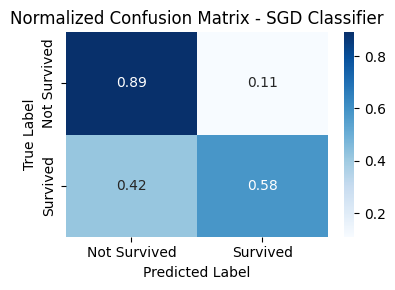

--------------------------------------------------
Logistic Regression
Metrics:
  Precision: 0.793
  Recall:    0.597
  F1 Score:  0.681


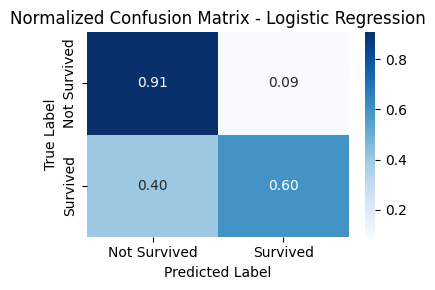

--------------------------------------------------
SVM
Metrics:
  Precision: 0.875
  Recall:    0.636
  F1 Score:  0.737


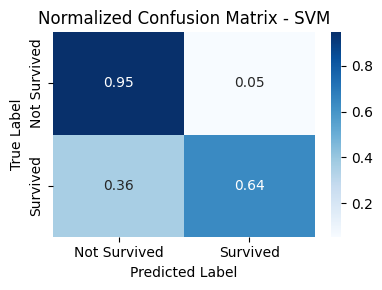

--------------------------------------------------
KNN
Metrics:
  Precision: 0.739
  Recall:    0.662
  F1 Score:  0.699


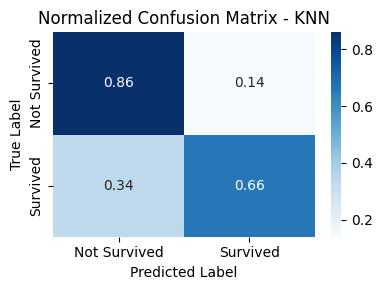

--------------------------------------------------
Decision Tree
Metrics:
  Precision: 0.730
  Recall:    0.701
  F1 Score:  0.715


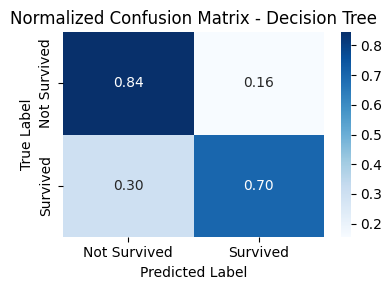

--------------------------------------------------
Random Forest
Metrics:
  Precision: 0.704
  Recall:    0.649
  F1 Score:  0.676


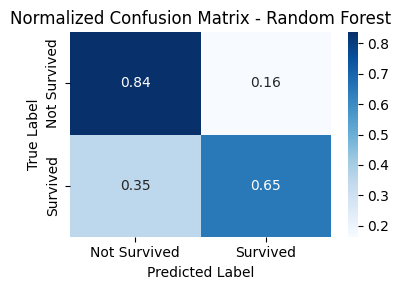

--------------------------------------------------
Neural Network
Metrics:
  Precision: 0.839
  Recall:    0.610
  F1 Score:  0.707


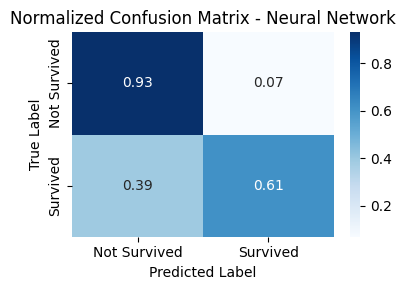

--------------------------------------------------


In [85]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV

# Define a function that ensures the classifier outputs probabilities.
def ensure_proba(model):
    if not hasattr(model, "predict_proba"):
        return CalibratedClassifierCV(model, cv=3)
    return model

# Define a dictionary of models with default (untuned) parameters.
models = {
    'SGD Classifier': SGDClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}

# Lists to store results and avoid duplicate training.
results = []
trained_models = {}

# Train each model once, compute metrics, and show the normalized confusion matrix.
for name, model in models.items():
    clf = ensure_proba(model)
    clf.fit(X_train, y_train)
    trained_models[name] = clf

    # Get predictions and probability estimates
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]  # Probability of class '1' (Survived)

    # Compute evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    results.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })


    # Print model
    print(f"{name}")

    # Print metrics for the current model
    print(f"Metrics:")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall:    {recall:.3f}")
    print(f"  F1 Score:  {f1:.3f}")

    # Compute the normalized confusion matrix
    cm = confusion_matrix(y_test, y_pred, normalize='true')

    # Plot the normalized confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt=".2f",
                xticklabels=["Not Survived", "Survived"],
                yticklabels=["Not Survived", "Survived"])
    plt.title(f"Normalized Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()
    print("-" * 50)

### Compare different models

In [86]:
# Create a DataFrame from the metrics for all models
results_df = pd.DataFrame(results)
print("\nSummary of model performance:")
print(results_df)


Summary of model performance:
                 Model  Precision    Recall  F1 Score
0       SGD Classifier   0.762712  0.584416  0.661765
1  Logistic Regression   0.793103  0.597403  0.681481
2                  SVM   0.875000  0.636364  0.736842
3                  KNN   0.739130  0.662338  0.698630
4        Decision Tree   0.729730  0.701299  0.715232
5        Random Forest   0.704225  0.649351  0.675676
6       Neural Network   0.839286  0.610390  0.706767


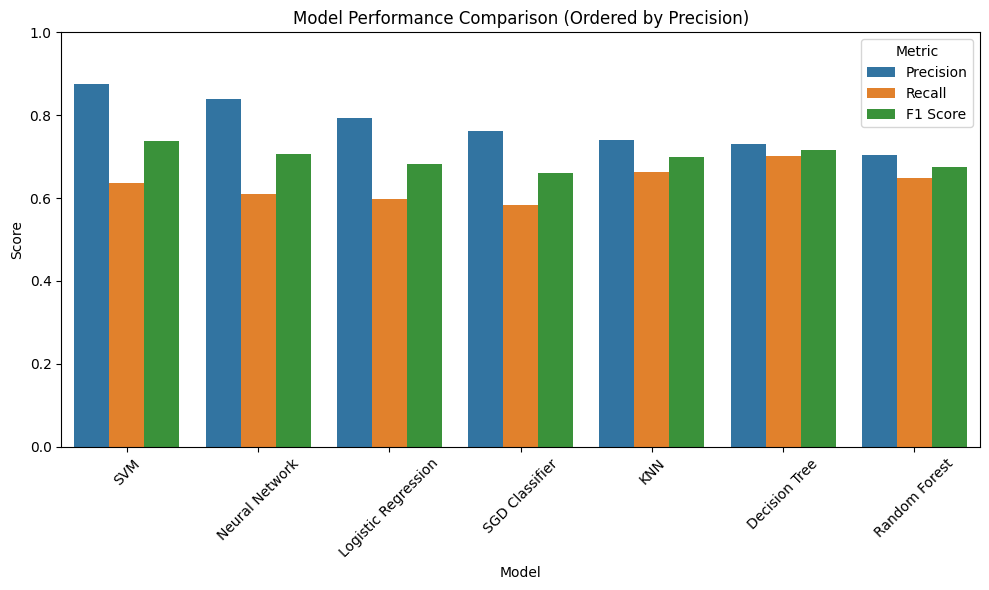

In [87]:
# Reshape the DataFrame to a long format for plotting with Seaborn
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Determine the order of models based on descending Precision
order = results_df.sort_values("Precision", ascending=False)["Model"]

# Create a grouped bar plot for performance metrics with models ordered by Precision
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted, order=order)
plt.ylim(0, 1)
plt.title("Model Performance Comparison (Ordered by Precision)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


Since Random Forest is our worst performing model, we are going to try to optimize it. This model has two interesting concepts to explore further:
* Feature importance: it can give us a metric regarding which features are more important in determining if a passenger survives or not
* Ensemble model: this is a strong learner that is obtained by combining multiplea weak learners. This is good for avoiding overfitting if done correctly

## Optimize Random Forest
[Source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Since Random Forest is an ensemble method, which combines multiple weak learners (single decision trees) into one strong learner, we need the weak learners to be independant. Therefore, we can fit each one on a subset of the entire dataset, and/or with a subset of the features. We are going to apply both. For that we set bootstrap = True, and in max_features and max_samples we set a float number between 0 and 1, that represents the size of the subset in relation to the entire number of features and dataset size, respectively.

### Grid Search

In [88]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid that includes parameters that can help reduce overfitting.
param_grid = {
    'max_depth': [7, 8, 9],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object using k-fold cross-validation and optimize for accuracy.
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators=1000, random_state=42, bootstrap=True, max_features=0.2, max_samples=0.2),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

print("Starting Grid Search ...")
grid_search.fit(X_train, y_train)

# Display the best hyperparameters and the corresponding CV accuracy.
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Starting Grid Search ...
Best Parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.8302646261756735


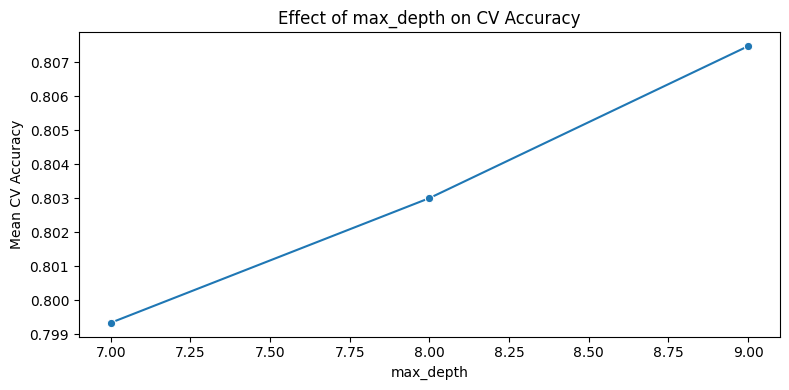

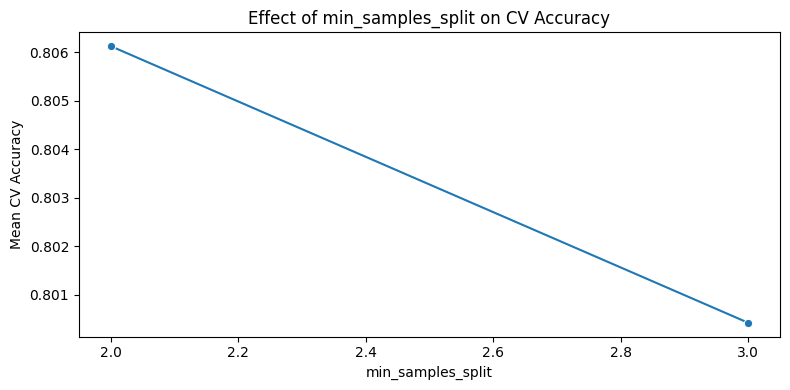

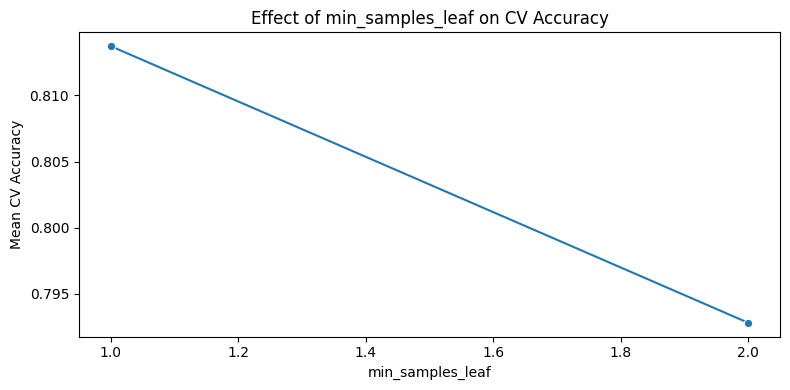

In [89]:
# Convert cv_results_ dict into a DataFrame.
cv_results = pd.DataFrame(grid_search.cv_results_)

# List of hyperparameters we want to analyze.
params = list(param_grid.keys())

# Loop through each parameter.
for param in params:
    # Skip parameters that have only one value in the grid.
    if len(cv_results[f'param_{param}'].unique()) <= 1:
        continue

    # Group by the parameter value and compute the average mean_test_score.
    df_agg = cv_results.groupby(f'param_{param}')['mean_test_score'].mean().reset_index()

    # Try to convert the parameter values to numeric.
    try:
        df_agg['param_numeric'] = pd.to_numeric(df_agg[f'param_{param}'])
        is_numeric = True
    except Exception as e:
        is_numeric = False

    plt.figure(figsize=(8, 4))
    if is_numeric:
        # For numeric parameters, use a line plot.
        sns.lineplot(data=df_agg, x='param_numeric', y='mean_test_score', marker='o')
        plt.xlabel(param)
    else:
        # For non-numeric parameters, use a bar plot.
        sns.barplot(data=df_agg, x=f'param_{param}', y='mean_test_score')
        plt.xlabel(param)
    plt.ylabel('Mean CV Accuracy')
    plt.title(f'Effect of {param} on CV Accuracy')
    plt.tight_layout()
    plt.show()


In [90]:
# Create a DataFrame from cv_results_ for detailed inspection.
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values(by='mean_test_score', ascending=False)
print("\nGrid Search CV Results (Top 10):")
print(results_df[['mean_test_score', 'params']].head(10))


Grid Search CV Results (Top 10):
   mean_test_score                                             params
8         0.830265  {'max_depth': 9, 'min_samples_leaf': 1, 'min_s...
4         0.818906  {'max_depth': 8, 'min_samples_leaf': 1, 'min_s...
9         0.814012  {'max_depth': 9, 'min_samples_leaf': 1, 'min_s...
0         0.809110  {'max_depth': 7, 'min_samples_leaf': 1, 'min_s...
5         0.807476  {'max_depth': 8, 'min_samples_leaf': 1, 'min_s...
1         0.802590  {'max_depth': 7, 'min_samples_leaf': 1, 'min_s...
2         0.792818  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...
3         0.792818  {'max_depth': 7, 'min_samples_leaf': 2, 'min_s...
6         0.792818  {'max_depth': 8, 'min_samples_leaf': 2, 'min_s...
7         0.792818  {'max_depth': 8, 'min_samples_leaf': 2, 'min_s...


### Best estimator metrics

In [91]:
from sklearn.metrics import classification_report

# Evaluate the best model on the test set.
rf_clf = grid_search.best_estimator_
test_accuracy = rf_clf.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, rf_clf.predict(X_test)))

Test Set Accuracy: 0.8048780487804879

Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       128
         1.0       0.78      0.68      0.72        77

    accuracy                           0.80       205
   macro avg       0.80      0.78      0.79       205
weighted avg       0.80      0.80      0.80       205



### Feature importance
The random forest model gives us an estimate on how each feature affects the survival probability. In the following figure, we can see that the top 3 features that impact on survival probability are sex, fare and age.

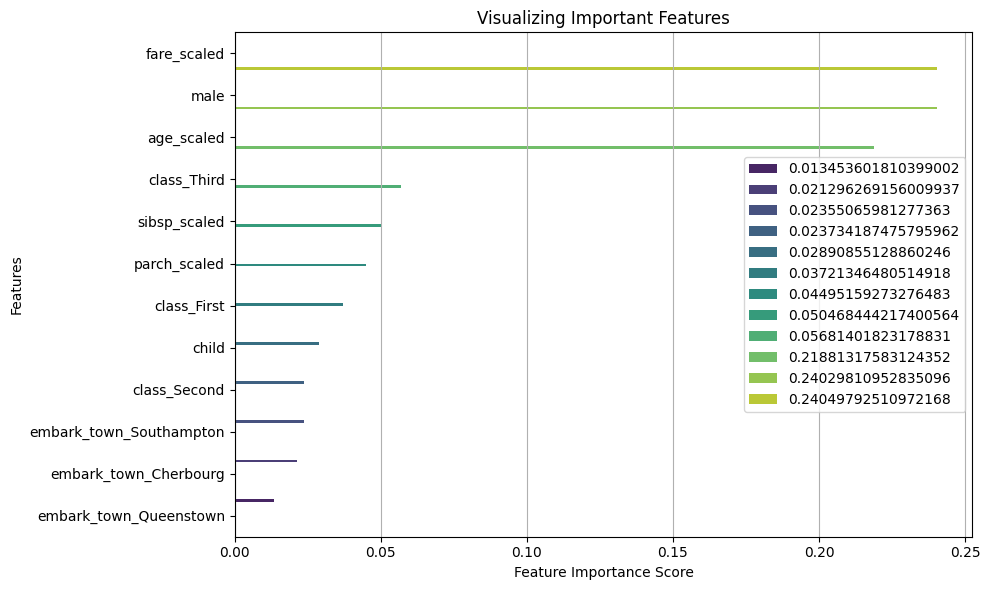

In [92]:
feature_imp = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.grid(True)
sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis', hue=feature_imp)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

## Optimize SVM
Since SVM without optimization outperformed even the optimized random forest in terms of accuracy in our first model comparison, we are going to try to optimize it to see if we can improve it further

### Grid Search

In [93]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid that includes parameters that can help reduce overfitting.
param_grid = {
    'C': np.linspace(0.0001,1, num=10),
    'kernel': ['linear','poly','rbf'],
    'degree': [1, 2, 3]
}

# Create a GridSearchCV object using 5-fold cross-validation and optimize for accuracy.
grid_search = GridSearchCV(
    estimator=SVC(random_state=42, probability=True),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

print("Starting Grid Search ...")
grid_search.fit(X_train, y_train)

# Display the best hyperparameters and the corresponding CV accuracy.
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Starting Grid Search ...
Best Parameters: {'C': 1.0, 'degree': 2, 'kernel': 'poly'}
Best CV Accuracy: 0.8221186035389766


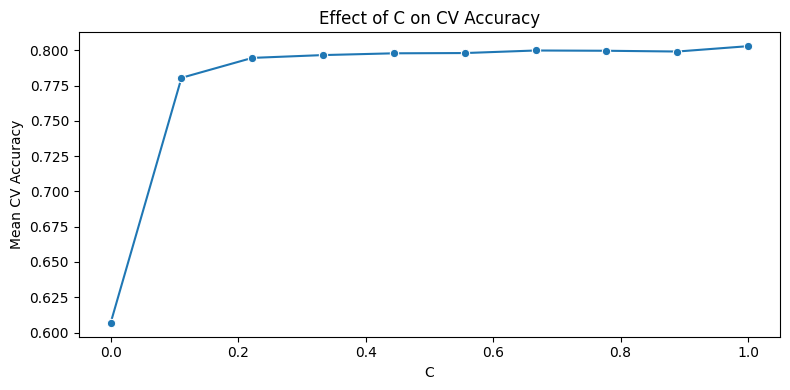

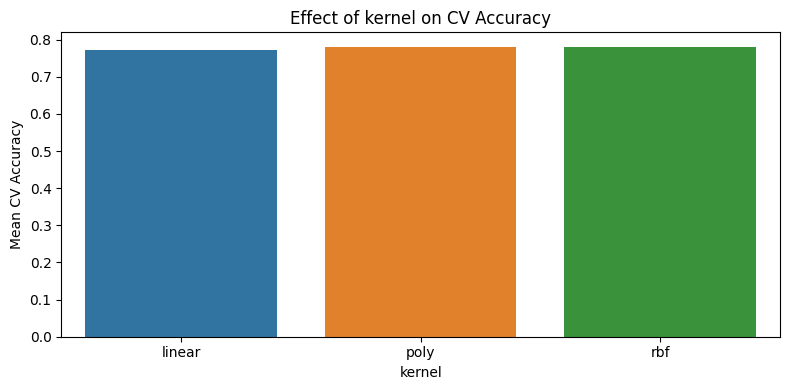

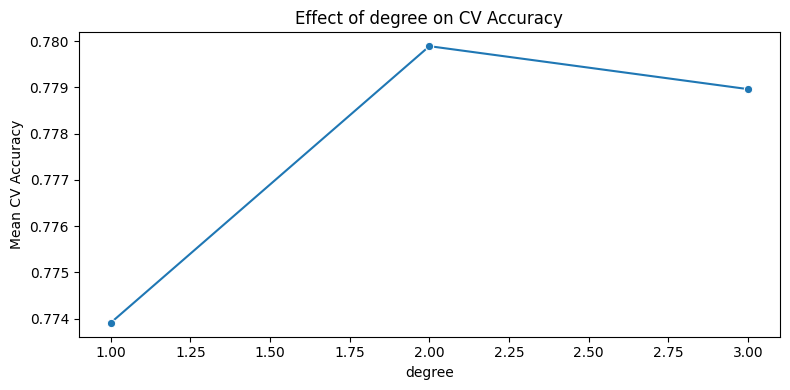

In [94]:
# Convert cv_results_ dict into a DataFrame.
cv_results = pd.DataFrame(grid_search.cv_results_)

# List of hyperparameters we want to analyze.
params = list(param_grid.keys())

# Loop through each parameter.
for param in params:
    # Skip parameters that have only one value in the grid.
    if len(cv_results[f'param_{param}'].unique()) <= 1:
        continue

    # Group by the parameter value and compute the average mean_test_score.
    df_agg = cv_results.groupby(f'param_{param}')['mean_test_score'].mean().reset_index()

    # Try to convert the parameter values to numeric.
    try:
        df_agg['param_numeric'] = pd.to_numeric(df_agg[f'param_{param}'])
        is_numeric = True
    except Exception as e:
        is_numeric = False

    plt.figure(figsize=(8, 4))
    if is_numeric:
        # For numeric parameters, use a line plot.
        sns.lineplot(data=df_agg, x='param_numeric', y='mean_test_score', marker='o')
        plt.xlabel(param)
    else:
        # For non-numeric parameters, use a bar plot.
        sns.barplot(data=df_agg, x=f'param_{param}', y='mean_test_score')
        plt.xlabel(param)
    plt.ylabel('Mean CV Accuracy')
    plt.title(f'Effect of {param} on CV Accuracy')
    plt.tight_layout()
    plt.show()


### Best estimator metrics

In [95]:
from sklearn.metrics import classification_report

# Evaluate the best model on the test set.
svm_clf = grid_search.best_estimator_
test_accuracy = svm_clf.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, svm_clf.predict(X_test)))

Test Set Accuracy: 0.8146341463414634

Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       128
         1.0       0.81      0.66      0.73        77

    accuracy                           0.81       205
   macro avg       0.81      0.78      0.79       205
weighted avg       0.81      0.81      0.81       205



## Save best model
Comparing Random Forest and SVM, we get similar performance (accuracy) on the test set. Since SVM is the best performing model, we are going to store it

In [96]:
import joblib

# save
joblib.dump(svm_clf, "model.pkl")

['model.pkl']

In [97]:
# load
clf_model = joblib.load("model.pkl")

# Kaggle Competition
This section is optional, we are going to submit our results to the Kaggle competitions plataform to see how well our model performs against other models trained by the community (after submission, a position on the leaderboard is presented)

[Link to competition](https://www.kaggle.com/c/titanic/overview)

We must output a csv containing two columns: PassengerID and Survived. This csv must be generated with our model's prediction on the test data

**Create pipeline**

We want a single pipeline that does all the preprocessing of the new data. We are going to define a new Transformer based on our preprocessing steps

Missing data will be assigned the test data's medians of the corresponding features

In [98]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline

# Custom transformer for processing new data
class TitanicPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, training_age_medians, training_fare_median, age_min=0, age_max=122):
        # training_age_medians: a Series with MultiIndex (pclass, sibsp_bin, parch_bin)
        # training_fare_median: a scalar median for fare from the train data
        self.training_age_medians = training_age_medians
        self.training_fare_median = training_fare_median
        self.age_min = age_min
        self.age_max = age_max
        self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        self.sibsp_scaler = MinMaxScaler()
        self.parch_scaler = MinMaxScaler()
        self.fare_scaler = StandardScaler()

    def fit(self, X, y=None):
        X_proc = self._rename_and_cast(X.copy())
        # Fit one-hot encoder on categorical columns
        self.encoder.fit(X_proc[['sex', 'embarked', 'pclass']])
        # Fit scalers on numeric columns
        self.sibsp_scaler.fit(X_proc[['sibsp']])
        self.parch_scaler.fit(X_proc[['parch']])
        self.fare_scaler.fit(X_proc[['fare']])
        return self

    def transform(self, X, y=None):
        X = self._rename_and_cast(X.copy())
        # Drop rows with missing 'embarked'
        X = X.dropna(subset=['embarked']).reset_index(drop=True)
        # Impute missing age using training medians computed per group
        X['sibsp_bin'] = X['sibsp'].apply(lambda x: '0' if x == 0 else '>0')
        X['parch_bin'] = X['parch'].apply(lambda x: '0' if x == 0 else ('1_or_2' if x <= 2 else '3_plus'))
        def impute_age(row):
            if pd.isnull(row['age']):
                key = (row['pclass'], row['sibsp_bin'], row['parch_bin'])
                # Use group median if available; otherwise, overall median from training medians
                return self.training_age_medians.get(key, self.training_age_medians.median())
            return row['age']
        X['age'] = X.apply(impute_age, axis=1)
        X.drop(columns=['sibsp_bin', 'parch_bin'], inplace=True)
        # Impute missing fare with training fare median
        X['fare'].fillna(self.training_fare_median, inplace=True)
        # Create new features
        X['child'] = (X['age'] <= 15).astype(float)
        X['age_scaled'] = (X['age'] - self.age_min) / (self.age_max - self.age_min)
        X['sibsp_scaled'] = self.sibsp_scaler.transform(X[['sibsp']])
        X['parch_scaled'] = self.parch_scaler.transform(X[['parch']])
        X['fare_scaled'] = self.fare_scaler.transform(X[['fare']])
        # One-hot encode categorical features
        encoded = self.encoder.transform(X[['sex', 'embarked', 'pclass']])
        encoded_df = pd.DataFrame(encoded,
                                  columns=self.encoder.get_feature_names_out(['sex', 'embarked', 'pclass']),
                                  index=X.index)
        X = pd.concat([X, encoded_df], axis=1)
        # Drop unscaled and unused features
        for col in ['name', 'ticket', 'cabin', 'age', 'sibsp', 'parch', 'fare', 'sex', 'embarked', 'pclass']:
            if col in X.columns:
                X.drop(columns=[col], inplace=True)
        # Rename one-hot columns to match training output
        X.rename(columns={
            "embarked_C": "embark_town_Cherbourg",
            "embarked_Q": "embark_town_Queenstown",
            "embarked_S": "embark_town_Southampton",
            "pclass_1": "class_First",
            "pclass_2": "class_Second",
            "pclass_3": "class_Third",
            "sex_male": "male"
        }, inplace=True)
        # Drop redundant one-hot column if present
        if "sex_female" in X.columns:
            X.drop(columns=["sex_female"], inplace=True)
        # Reorder columns as required. Note: if 'survived' is not in test data, it is omitted.
        desired_cols = ['PassengerId', 'survived', 'age_scaled', 'male', 'child', 'fare_scaled',
                        'class_First', 'class_Second', 'class_Third', 'sibsp_scaled', 'parch_scaled',
                        'embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton']
        final_cols = [col for col in desired_cols if col in X.columns]
        return X[final_cols]

    def _rename_and_cast(self, X):
        # Rename columns to lowercase names matching the processing rules
        X = X.rename(columns={
            "PassengerId": "PassengerId",
            "Pclass": "pclass",
            "Name": "name",
            "Sex": "sex",
            "Age": "age",
            "SibSp": "sibsp",
            "Parch": "parch",
            "Ticket": "ticket",
            "Fare": "fare",
            "Cabin": "cabin",
            "Embarked": "embarked",
            "Survived": "survived"
        })
        # Set appropriate types
        if 'pclass' in X.columns:
            X['pclass'] = X['pclass'].astype(int)
        if 'sex' in X.columns:
            X['sex'] = X['sex'].astype('category')
        if 'age' in X.columns:
            X['age'] = X['age'].astype(float)
        if 'sibsp' in X.columns:
            X['sibsp'] = X['sibsp'].astype(int)
        if 'parch' in X.columns:
            X['parch'] = X['parch'].astype(int)
        if 'fare' in X.columns:
            X['fare'] = X['fare'].astype(float)
        if 'embarked' in X.columns:
            X['embarked'] = X['embarked'].astype('category')
        return X

In [99]:
# pipeline creation
preprocessor_pipeline = make_pipeline(
    TitanicPreprocessor(training_age_medians=training_age_medians, training_fare_median=training_fare_median)
)

**Process the new unlabeled data**

In [100]:
# Load test data
df_new = pd.read_csv('./titanic/test.csv')

# Fit the pipeline on the test data
preprocessor_pipeline.fit(df_new)

# Transform
df_new = preprocessor_pipeline.transform(df_new)

In [101]:
df_new.head()

,PassengerId,age_scaled,male,child,fare_scaled,class_First,class_Second,class_Third,sibsp_scaled,parch_scaled,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,892,0.282787,1.0,0.0,-0.497811,0.0,0.0,1.0,0.000,0.000000,0.0,1.0,0.0
1,893,0.385246,0.0,0.0,-0.512660,0.0,0.0,1.0,0.125,0.000000,0.0,0.0,1.0
2,894,0.508197,1.0,0.0,-0.464532,0.0,1.0,0.0,0.000,0.000000,0.0,1.0,0.0
3,895,0.221311,1.0,0.0,-0.482888,0.0,0.0,1.0,0.000,0.000000,0.0,0.0,1.0
4,896,0.180328,0.0,0.0,-0.417971,0.0,0.0,1.0,0.125,0.111111,0.0,0.0,1.0


**Make predictions on the new data**

In [102]:
# Predictors
X_new = df_new.drop(columns=['PassengerId'], axis=1) # We don't have the target column 'survived'

In [103]:
# Target (predicted)
y_new = svm_clf.predict(X_new)

In [104]:
# Create dataframe with the required format
submission_df = pd.DataFrame({
    "PassengerId": df_new['PassengerId'],
    "Survived": y_new.astype('int')
})

# Export dataset to a csv file
submission_df.to_csv('submission.csv', index=False)

In [105]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Predictions
We are going to pass the model some values containing a passenger's characteristics, and the model will give us the probability that the passenger survives

We are going to define a function that converts the values passed from the user in an intuitive format, to the format expected by our classification model

In [106]:
def predict_survival_probability(model, age, sibsp, parch, fare, male, pclass, embark_town):
  # Scale Age (using min=0 and max=122)
  min_age = 0
  max_age = 122
  age_scaled = (age - min_age) / (max_age - min_age)

  # Scale sibsp, parch, and fare using the pre-fit scalers.
  # (Ensure that scaler_sibsp, scaler_parch, and scaler_fare are already fitted on your training data.)
  sibsp_scaled = scaler_sibsp.transform(np.array([[sibsp]]))[0, 0]
  parch_scaled = scaler_parch.transform(np.array([[parch]]))[0, 0]
  fare_scaled = scaler_fare.transform(np.array([[fare]]))[0, 0]

  # Compute the "child" flag based on age (1 if age is 15 or below; otherwise 0)
  child = 1 if age <= 15 else 0

  # One-hot encode passenger class:
  if pclass == 1:
      class_First, class_Second, class_Third = 1.0, 0.0, 0.0
  elif pclass == 2:
      class_First, class_Second, class_Third = 0.0, 1.0, 0.0
  elif pclass == 3:
      class_First, class_Second, class_Third = 0.0, 0.0, 1.0
  else:
      raise ValueError("pclass must be one of 1, 2, or 3.")

  # One-hot encode embarkation town (case-insensitive):
  if embark_town.lower() == "cherbourg":
      embark_town_Cherbourg, embark_town_Queenstown, embark_town_Southampton = 1.0, 0.0, 0.0
  elif embark_town.lower() == "queenstown":
      embark_town_Cherbourg, embark_town_Queenstown, embark_town_Southampton = 0.0, 1.0, 0.0
  elif embark_town.lower() == "southampton":
      embark_town_Cherbourg, embark_town_Queenstown, embark_town_Southampton = 0.0, 0.0, 1.0
  else:
      raise ValueError("embark_town must be 'Cherbourg', 'Queenstown', or 'Southampton'.")

  # ----------------------------
  # CREATE THE INPUT DATAFRAME
  # The model expects the features in this order:
  # ['age_scaled', 'male', 'child', 'fare_scaled',
  #  'class_First', 'class_Second', 'class_Third',
  #  'sibsp_scaled', 'parch_scaled', 'embark_town_Cherbourg',
  #  'embark_town_Queenstown', 'embark_town_Southampton']
  input_data = {
      'age_scaled': [age_scaled],
      'male': [male],
      'child': [child],
      'fare_scaled': [fare_scaled],
      'class_First': [class_First],
      'class_Second': [class_Second],
      'class_Third': [class_Third],
      'sibsp_scaled': [sibsp_scaled],
      'parch_scaled': [parch_scaled],
      'embark_town_Cherbourg': [embark_town_Cherbourg],
      'embark_town_Queenstown': [embark_town_Queenstown],
      'embark_town_Southampton': [embark_town_Southampton]
  }

  new_sample = pd.DataFrame(input_data)

  # ----------------------------
  # PREDICTION
  # Use the trained classifier to predict probability of survival.
  # For binary classifiers that implement predict_proba, column 1 is typically the probability for the positive class.
  survival_probability = model.predict_proba(new_sample)[:, 1][0]
  print(f"Predicted Survival Probability: {survival_probability:.2f}")

  return survival_probability

In [107]:
age = 30              # Age in years (integer 0-122)
sibsp = 1             # Number of siblings/spouses aboard (integer)
parch = 0             # Number of parents/children aboard (integer)
fare = 50.0           # Fare paid for the ticket (float; unscaled)
male = 1              # 1 if the passenger is male, 0 if female
pclass = 2            # Passenger class (1, 2, or 3)
embark_town = "Southampton"  # Port of embarkation; choose one: "Cherbourg", "Queenstown", or "Southampton"

In [108]:
proba = predict_survival_probability(svm_clf, age, sibsp, parch, fare, male, pclass, embark_town)

Predicted Survival Probability: 0.17
